### MPG

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = sns.load_dataset('mpg')

In [2]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


결측치가 있는 행 처리

In [5]:
data.dropna(inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


#### Data Split

In [69]:
X = data.drop(['mpg', 'origin', 'name'], axis = 1)
y = data['mpg']

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42, shuffle = True
)

In [71]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year
260,6,225.0,110.0,3620,18.7,78
184,4,140.0,92.0,2572,14.9,76
174,6,171.0,97.0,2984,14.5,75
64,8,318.0,150.0,4135,13.5,72
344,4,86.0,64.0,1875,16.4,81


In [72]:
y_train.head()

260    18.6
184    25.0
174    18.0
64     15.0
344    39.0
Name: mpg, dtype: float64

#### Ordinary Least Sqaures

In [73]:
import statsmodels.api as sm

ols = sm.OLS(
    y_train,
    sm.add_constant(X_train)
).fit()

ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     218.4
Date:                Tue, 11 Jun 2024   Prob (F-statistic):          1.96e-107
Time:                        23:33:58   Log-Likelihood:                -832.28
No. Observations:                 313   AIC:                             1679.
Df Residuals:                     306   BIC:                             1705.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -15.0578      5.571     -2.703      0.007     -26.021      -4.095
cylinders       -0.1162      0.385     -0.302      0.763      -0.874       0.642
displacement     0.0010      0.008      0.121      0.904      -0.015       0.017
horsepower      -0.0023      0.016     -0.144      0.886      -0.033       0.029
weight          -0.0066      0.001     -8.807      0.000      -0.008      -0.005
acceleration     0.0617      0.115      0.537      0.591      -0.164       0.288
model_year       0.7606      0.062     12.333      0.000       0.639       0.882
==============================================================================
Omnibus:                       35.445   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.727
Skew:                           0.728   Prob(JB):                     3.55e-12
Kurtosis:                       4.388   Cond. No.                     8.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
ols_pred = ols.predict(sm.add_constant(X_test))
print(f'R squared for OLS model : {ols.rsquared_adj : .4f}')

R squared for OLS model :  0.8070


In [75]:
from sklearn.metrics import r2_score
r_squared_pred = r2_score(y_test, ols_pred)

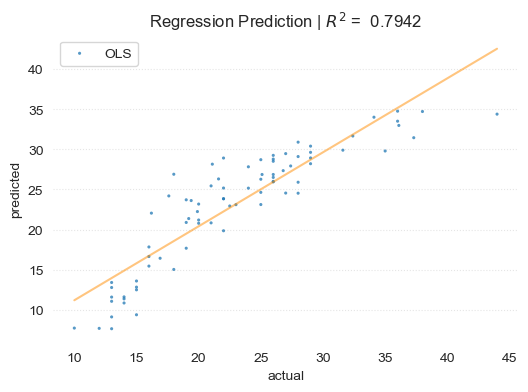

In [76]:
fig, ax = plt.subplots(figsize = (6, 4))
m, b = np.polyfit(y_test, ols_pred, 1)

ax.scatter(
    y_test,
    ols_pred, 
    label = 'OLS', 
    edgecolor = 'none',
    s = 5,
    alpha = 0.75
)
ax.plot(
    np.sort(y_test), 
    m * np.sort(y_test) + b,
    color = 'darkorange', 
    alpha = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
ax.legend()
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title(rf'Regression Prediction | $R^2$ = {r_squared_pred : .4f}')
plt.show()

#### Ridge Regression

In [77]:
ridge = sm.OLS(
    y_train,
    sm.add_constant(X_train)
).fit_regularized(
    method = 'elastic_net',
    L1_wt = 0,
    alpha = 0.01
)

In [78]:
ridge.params

array([-1.67968828, -0.26761927,  0.00293039, -0.02077204, -0.00620309,
       -0.05691095,  0.6268473 ])

In [79]:
r_squared = r2_score(y_train, ridge.fittedvalues)
ridge_pred = ridge.predict(sm.add_constant(X_test))
print(f'R-squared for Ridge model : {r_squared : .4f}')

R-squared for Ridge model :  0.8072


In [80]:
ridge_prob = r2_score(y_test, ridge_pred)

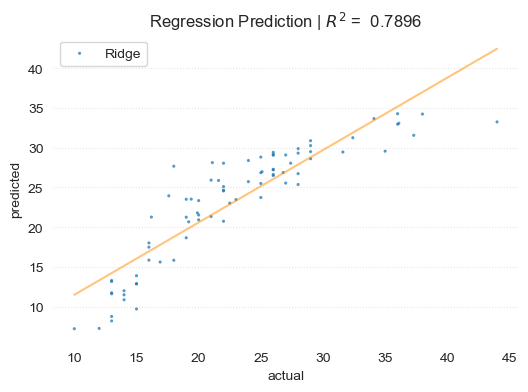

In [81]:
fig, ax = plt.subplots(figsize = (6, 4))
m, b = np.polyfit(y_test, ridge_pred, 1)

ax.scatter(
    y_test,
    ridge_pred, 
    label = 'Ridge', 
    edgecolor = 'none',
    s = 5,
    alpha = 0.75
)
ax.plot(
    np.sort(y_test), 
    m * np.sort(y_test) + b,
    color = 'darkorange', 
    alpha = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
ax.legend()
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title(rf'Regression Prediction | $R^2$ = {ridge_prob : .4f}')
plt.show()

#### Lasso Regression

In [82]:
lasso = sm.OLS(
    y_train,
    sm.add_constant(X_train)
).fit_regularized(
    method = 'elastic_net',
    L1_wt = 1,
    alpha = 0.01
)

In [83]:
lasso.params

const           18.426674
cylinders       -0.826770
displacement    -0.031173
horsepower       0.000086
weight          -0.001695
acceleration     0.465336
model_year       0.179575
dtype: float64

In [84]:
r_squared = r2_score(y_train, lasso.fittedvalues)
lasso_pred = lasso.predict(sm.add_constant(X_test))
print(f'R-squared for Lasso model : {r_squared : .4f}')

R-squared for Lasso model :  0.6993


In [85]:
lasso_prob = r2_score(y_test, lasso_pred)

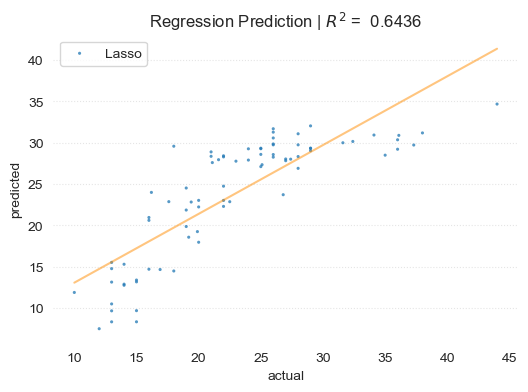

In [86]:
fig, ax = plt.subplots(figsize = (6, 4))
m, b = np.polyfit(y_test, lasso_pred, 1)

ax.scatter(
    y_test,
    lasso_pred, 
    label = 'Lasso', 
    edgecolor = 'none',
    s = 5,
    alpha = 0.75
)
ax.plot(
    np.sort(y_test), 
    m * np.sort(y_test) + b,
    color = 'darkorange', 
    alpha = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
ax.legend()
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title(rf'Regression Prediction | $R^2$ = {lasso_prob : .4f}')
plt.show()

#### Elastic net Regression

In [87]:
elastic = sm.OLS(
    y_train,
    sm.add_constant(X_train)
).fit_regularized(
    method = 'elastic_net',
    L1_wt = 0.5,
    alpha = 0.01
)

In [88]:
elastic.params

const           14.008471
cylinders       -0.546039
displacement    -0.036406
horsepower       0.012239
weight          -0.001671
acceleration     0.604799
model_year       0.184736
dtype: float64

In [89]:
r_squared = r2_score(y_train, elastic.fittedvalues)
elastic_pred = elastic.predict(sm.add_constant(X_test))
print(f'R-squared for Elastic model : {r_squared : .4f}')

R-squared for Elastic model :  0.6870


In [90]:
elastic_prob = r2_score(y_test, elastic_pred)

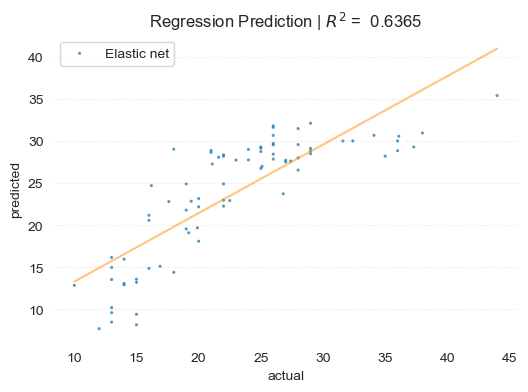

In [96]:
fig, ax = plt.subplots(figsize = (6, 4))
m, b = np.polyfit(y_test, elastic_pred, 1)

ax.scatter(
    y_test,
    elastic_pred, 
    label = 'Elastic net', 
    edgecolor = 'none',
    s = 5,
    alpha = 0.75
)
ax.plot(
    np.sort(y_test), 
    m * np.sort(y_test) + b,
    color = 'darkorange', 
    alpha = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
ax.legend()
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title(rf'Regression Prediction | $R^2$ = {elastic_prob : .4f}')
plt.show()

#### Support Vector Regression

In [101]:
from sklearn.svm import SVR

support_vector = SVR(
    kernel = 'linear',
    C = 0.1,
    tol = 0.001
)
support_vector.fit(X_train, y_train)

SVR(C=0.1, kernel='linear')

In [93]:
svm_pred = support_vector.predict(X_test)
r_squared = r2_score(y_train, support_vector.predict(X_train))
print(f'R-squared for Support Vector model : {r_squared : .4f}')

R-squared for Support Vector model :  0.8022


In [94]:
svm_prob = r2_score(y_test, support_vector.predict(X_test))

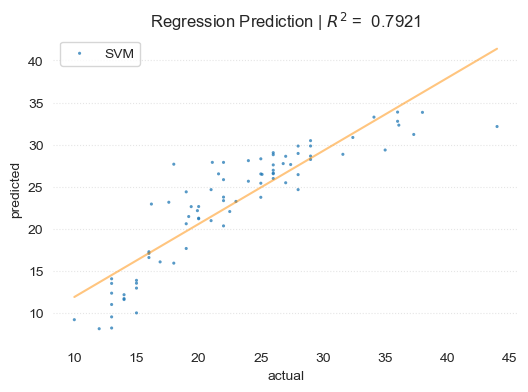

In [97]:
fig, ax = plt.subplots(figsize = (6, 4))
m, b = np.polyfit(y_test, svm_pred, 1)

ax.scatter(
    y_test,
    svm_pred, 
    label = 'SVM', 
    edgecolor = 'none',
    s = 5,
    alpha = 0.75
)
ax.plot(
    np.sort(y_test), 
    m * np.sort(y_test) + b,
    color = 'darkorange', 
    alpha = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
ax.legend()
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title(rf'Regression Prediction | $R^2$ = {svm_prob : .4f}')
plt.show()

#### K Neighbors Regression

In [98]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [102]:
knn_score = r2_score(y_train, knn.predict(X_train))
knn_pred = knn.predict(X_test)
print(f'R-squared for KNN model : {knn_score : .4f}')

R-squared for KNN model :  0.8060


In [103]:
knn_prob = r2_score(y_test, knn_pred)

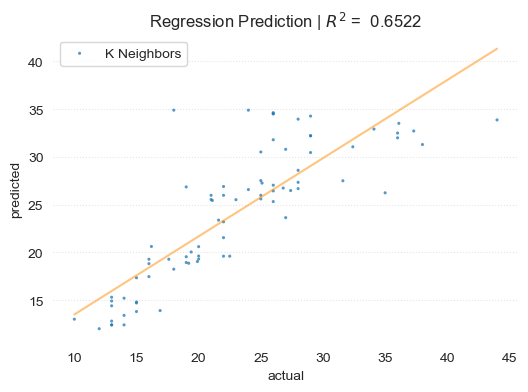

In [104]:
fig, ax = plt.subplots(figsize = (6, 4))
m, b = np.polyfit(y_test, knn_pred, 1)

ax.scatter(
    y_test,
    knn_pred, 
    label = 'K Neighbors', 
    edgecolor = 'none',
    s = 5,
    alpha = 0.75
)
ax.plot(
    np.sort(y_test), 
    m * np.sort(y_test) + b,
    color = 'darkorange', 
    alpha = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
ax.legend()
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title(rf'Regression Prediction | $R^2$ = {knn_prob : .4f}')
plt.show()

#### Decision Tree Regression

In [105]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(
    criterion = 'squared_error',
    max_depth = 5,
    random_state = 42,
    min_samples_split = 2
)

tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [106]:
tree_score = r2_score(y_train, tree.predict(X_train))
tree_pred = tree.predict(X_test)
print(f'R-squared for Decision Tree model : {tree_score : .4f}')

R-squared for Decision Tree model :  0.9306


In [107]:
tree_prob = r2_score(y_test, tree_pred)

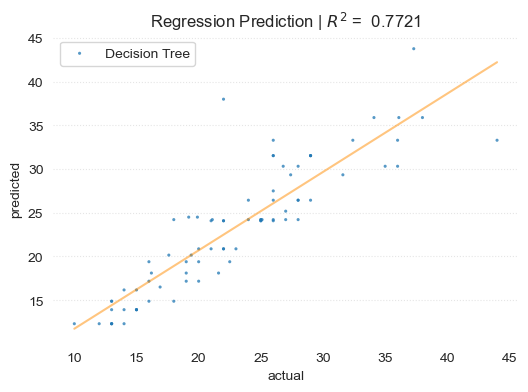

In [108]:
fig, ax = plt.subplots(figsize = (6, 4))
m, b = np.polyfit(y_test, tree_pred, 1)

ax.scatter(
    y_test,
    tree_pred, 
    label = 'Decision Tree', 
    edgecolor = 'none',
    s = 5,
    alpha = 0.75
)
ax.plot(
    np.sort(y_test), 
    m * np.sort(y_test) + b,
    color = 'darkorange', 
    alpha = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
ax.legend()
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title(rf'Regression Prediction | $R^2$ = {tree_prob : .4f}')
plt.show()

#### Random Forest Regression

In [109]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(
    n_estimators = 1000,
    criterion = 'squared_error',
    max_depth = 5,
    random_state = 42
)

forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=1000, random_state=42)

In [110]:
forest_score = r2_score(y_train, forest.predict(X_train))
forest_pred = forest.predict(X_test)
print(f'R-squared for Random Forest : {forest_score : .4f}')

R-squared for Random Forest :  0.9423


In [111]:
forest_prob = r2_score(y_test, forest_pred)

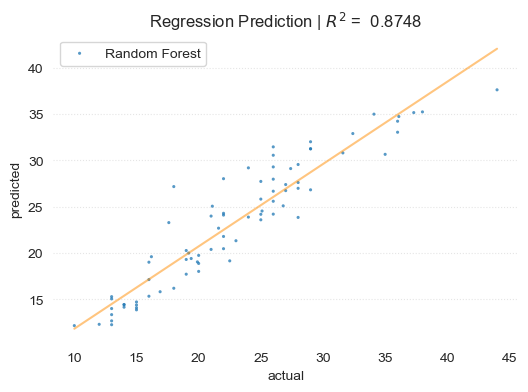

In [112]:
fig, ax = plt.subplots(figsize = (6, 4))
m, b = np.polyfit(y_test, forest_pred, 1)

ax.scatter(
    y_test,
    forest_pred, 
    label = 'Random Forest', 
    edgecolor = 'none',
    s = 5,
    alpha = 0.75
)
ax.plot(
    np.sort(y_test), 
    m * np.sort(y_test) + b,
    color = 'darkorange', 
    alpha = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
ax.legend()
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title(rf'Regression Prediction | $R^2$ = {forest_prob : .4f}')
plt.show()

#### Bagging Regression

In [113]:
from sklearn.ensemble import BaggingRegressor

base = RandomForestRegressor(
    n_estimators = 10,
    criterion = 'squared_error',
    max_depth = 5,
    random_state = 42
)

bagging = BaggingRegressor(
    estimator = base,
    n_estimators = 1000,
    random_state = 42
)

bagging.fit(X_train, y_train)

BaggingRegressor(estimator=RandomForestRegressor(max_depth=5, n_estimators=10,
                                                 random_state=42),
                 n_estimators=1000, random_state=42)

In [114]:
bagging_score = r2_score(y_train, bagging.predict(X_train))
bagging_pred = bagging.predict(X_test)
print(f'R-squared for Bagging model : {bagging_score : .4f}')

R-squared for Bagging model :  0.9290


In [115]:
bagging_prob = r2_score(y_test, bagging_pred)

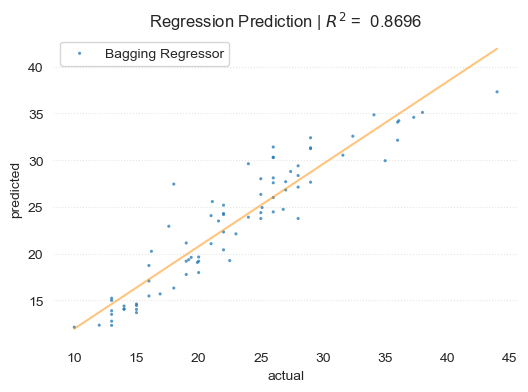

In [121]:
fig, ax = plt.subplots(figsize = (6, 4))
m, b = np.polyfit(y_test, bagging_pred, 1)

ax.scatter(
    y_test,
    bagging_pred, 
    label = 'Bagging Regressor', 
    edgecolor = 'none',
    s = 5,
    alpha = 0.75
)
ax.plot(
    np.sort(y_test), 
    m * np.sort(y_test) + b,
    color = 'darkorange', 
    alpha = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
ax.legend()
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title(rf'Regression Prediction | $R^2$ = {bagging_prob : .4f}')
plt.show()

#### Stacking Regression

In [118]:
from sklearn.ensemble import StackingRegressor

stack_base = [
    (
        'random_forest', RandomForestRegressor(
            n_estimators = 1000,
            random_state = 42,
            criterion = 'squared_error',
            max_depth = 5,
            max_samples = 3,
            min_samples_split = 2
        )
    ), (
        'support_vecto_regression', SVR(
            kernel = 'linear',
            C = 1.0
        )
    ), (
        'KNN', KNeighborsRegressor(
            n_neighbors = 5
        )
    )
]

meta_model = RandomForestRegressor(
    random_state = 42,
    n_estimators = 1000,
    criterion = 'squared_error',
    max_depth = 5,
    max_samples = 3,
    min_samples_split = 2
)

stacking = StackingRegressor(
    estimators = stack_base,
    final_estimator = meta_model,
    cv = 5
)

stacking.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('random_forest',
                               RandomForestRegressor(max_depth=5, max_samples=3,
                                                     n_estimators=1000,
                                                     random_state=42)),
                              ('support_vecto_regression',
                               SVR(kernel='linear')),
                              ('KNN', KNeighborsRegressor())],
                  final_estimator=RandomForestRegressor(max_depth=5,
                                                        max_samples=3,
                                                        n_estimators=1000,
                                                        random_state=42))

In [119]:
stack_score = r2_score(y_train, stacking.predict(X_train))
stacking_pred = stacking.predict(X_test)
print(f'R-squared for Stacking model : {stack_score : .4f}')

R-squared for Stacking model :  0.7154


In [120]:
stacking_prob = r2_score(y_test, stacking_pred)

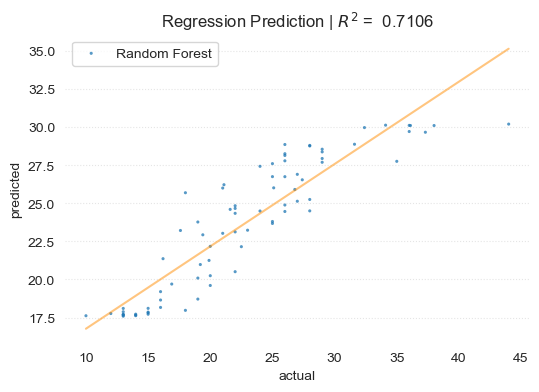

In [123]:
fig, ax = plt.subplots(figsize = (6, 4))
m, b = np.polyfit(y_test, stacking_pred, 1)

ax.scatter(
    y_test,
    stacking_pred, 
    label = 'Random Forest', 
    edgecolor = 'none',
    s = 5,
    alpha = 0.75
)
ax.plot(
    np.sort(y_test), 
    m * np.sort(y_test) + b,
    color = 'darkorange', 
    alpha = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
ax.legend()
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title(rf'Regression Prediction | $R^2$ = {stacking_prob : .4f}')
plt.show()